# Accessing image files in the owncloud

**NOTE: This notebook has been moded to the section "remote files"**


This notebook we will demonstrate how to download files from an owncloud server, how to process it locally and upload the results back to the server.

Depending on which cloud we use, we may have to install different libaries.

* Owncloud installation
```
pip install pyocclient
```

* Nextcloud installation
```
pip install pyncclient
```

In [1]:
from skimage.io import imread, imshow, imsave
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling
import ipywidgets as widgets

import owncloud
# import nextcloud_client as owncloud

## Login
After executing the next cell locally, you will see three input fields where you can enter the server url, username and password.

![](login.png)

In [2]:
server_widget = widgets.Text(value='https://sharing.biotec.tu-dresden.de', description='Server')
username_widget = widgets.Text(description='Username:')
password_widget = widgets.Password(description='Password')

widgets.VBox([server_widget, username_widget, password_widget])

**Do NOT hit Shift-Enter after entering username and password**

In [3]:
if username_widget.value == '':
    raise RuntimeError('Enter username and password above')

In [4]:
oc = owncloud.Client(server_widget.value)
oc.login(username_widget.value, password_widget.value)

A typical error message is 401: Access denied. Check your username and password.

## Browsing the remote server
To see if the connection was successful, we can just list the files in a given folder.

In [5]:
# enter a folder on the owncloud drive that exists. '/' is the root folder.
remote_folder = "/data/"

for f in oc.list(remote_folder):
    print (f.path)

/data/blobs.tif
/data/blobs_labels.tif
/data/testfolder/
/data/zfish_nucl_env.tif


In [6]:
import tempfile
temp_folder = tempfile.TemporaryDirectory(prefix="napari-owncloud")


In [11]:
import os

temp_dir = temp_folder.name.replace("\\", "/") + remote_folder

os.path.isdir(temp_dir)

True

In [12]:

os.mkdir(temp_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/haase/AppData/Local/Temp/napari-owncloudc0epk0iu/data/'

## Retrieving a file
We can download a file to a local directory.

In [6]:
# enter the source file here
remote_source_file = '/data/blobs.tif'
# enter the destination
local_file = 'blobs.tif'

oc.get_file(remote_path=remote_source_file, 
            local_file=local_file)

True

## Image processing
As we downloaded the file, image processing works as usual.

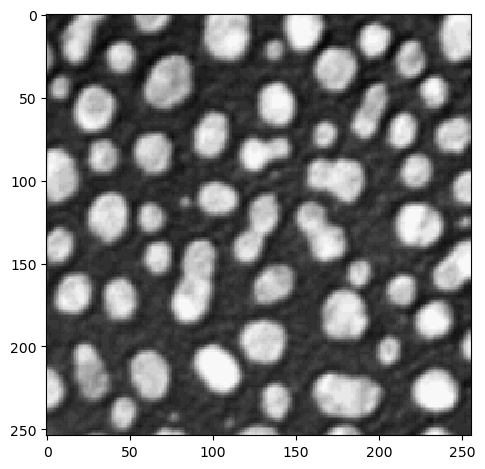

In [7]:
image = imread(local_file)
imshow(image)

StackViewNDArray([[0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
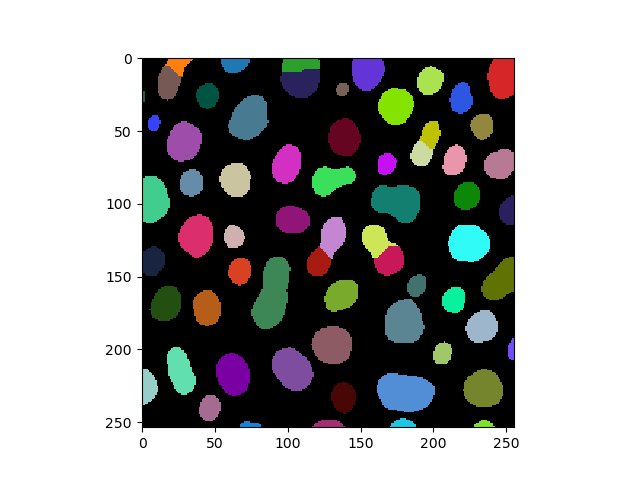

In [8]:
labels = voronoi_otsu_labeling(image, spot_sigma=3.5)
labels

## Uploading results
Before uploading an image to the cloud we need to save it locally.

In [9]:
local_file_to_upload = "blobs_labels.tif"

imsave(local_file_to_upload, labels, check_contrast=False)

We will upload the file to this folder:

In [10]:
remote_folder

'/data/'

In [11]:
oc.put_file(remote_folder, local_file_to_upload)

True

Just to be sure, we check if the file arrived by printing out the files in the folder again.

In [12]:
for f in oc.list(remote_folder):
    print (f.path)

/data/blobs.tif
/data/blobs_labels.tif
/data/zfish_nucl_env.tif


## Logout
When you're done, log out!

In [13]:
oc.logout()

True